<a href="https://colab.research.google.com/github/ifte110/tensorflow-deep-learning-0toM-Self-Practice/blob/main/03_intro_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-12 17:32:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   145MB/s    in 0.7s    

2023-08-12 17:32:52 (145 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images\
  in {dirpath} .")

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}")



In [ ]:
view_random_image("pizza_steak/train/","steak" )

NameError: ignored

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from keras.api._v2.keras import activations
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

model_1 =tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 158ms/step - loss: 0.6235 - accuracy: 0.6560 - val_loss: 0.4945 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.5045 - accuracy: 0.7640 - val_loss: 0.4194 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4630 - accuracy: 0.7960 - val_loss: 0.4183 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4349 - accuracy: 0.8087 - val_loss: 0.3746 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3939 - accuracy: 0.8193 - val_loss: 0.3723 - val_accuracy: 0.8340


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from keras.api._v2.keras import activations
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                       batch_size=32, target_size=(224,224),
                                       class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_2 = Sequential([
    Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")

])

model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data) ,
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 144ms/step - loss: 0.5965 - accuracy: 0.6993 - val_loss: 0.4477 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4702 - accuracy: 0.7833 - val_loss: 0.3909 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4491 - accuracy: 0.7907 - val_loss: 0.4576 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 8s 161ms/step - loss: 0.4052 - accuracy: 0.8273 - val_loss: 0.3459 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3879 - accuracy: 0.8320 - val_loss: 0.3322 - val_accuracy: 0.8640


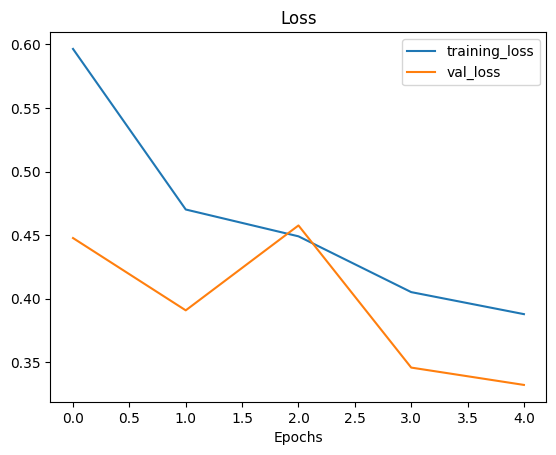

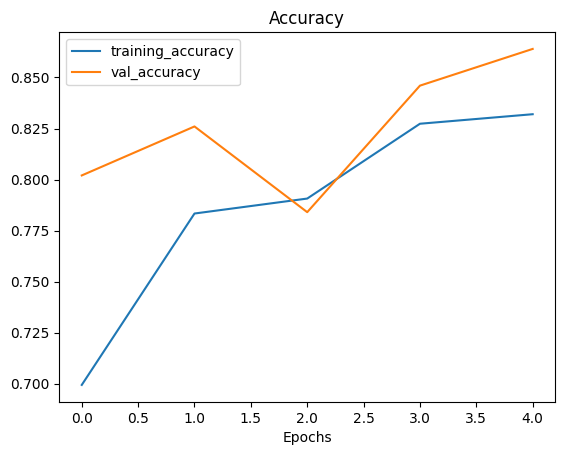

In [ ]:
plot_loss_curves(history_2)

In [ ]:
from tensorflow.python.ops.gen_nn_ops import MaxPool
from keras.api._v2.keras import activations
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
train_data_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)


train_datagen = ImageDataGenerator(rescale=1/255.)

valid_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print('Augmented training Data')

train_dir = "/content/pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data_aug = train_data_aug.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    shuffle=True)

print("non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


print("non-Augmented test data")
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",)

Augmented training Data
Found 1500 images belonging to 2 classes.
non-Augmented training data
Found 1500 images belonging to 2 classes.
non-Augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images, label = train_data.next()
aug_images , aug_labels = train_data_aug.next()

showing image : 17


(-0.5, 223.5, 223.5, -0.5)

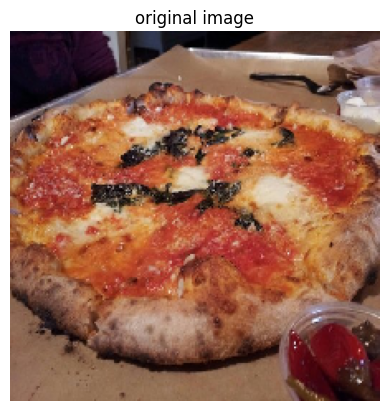

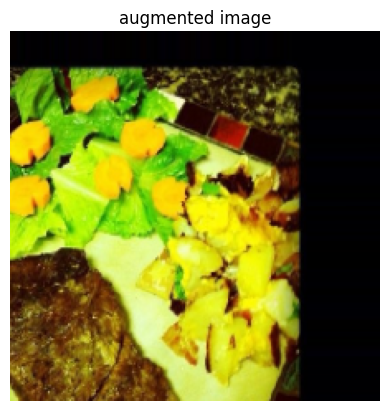

In [ ]:
import random
import matplotlib.pyplot as plt

random_number = random.randint(0,32)
print(f"showing image : {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [ ]:
# Create the model (same as model_5)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_aug, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 36s 481ms/step - loss: 0.6868 - accuracy: 0.5720 - val_loss: 0.6079 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.5888 - accuracy: 0.6793 - val_loss: 0.3982 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5140 - accuracy: 0.7480 - val_loss: 0.3570 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4901 - accuracy: 0.7727 - val_loss: 0.3437 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4739 - accuracy: 0.7747 - val_loss: 0.3253 - val_accuracy: 0.8680


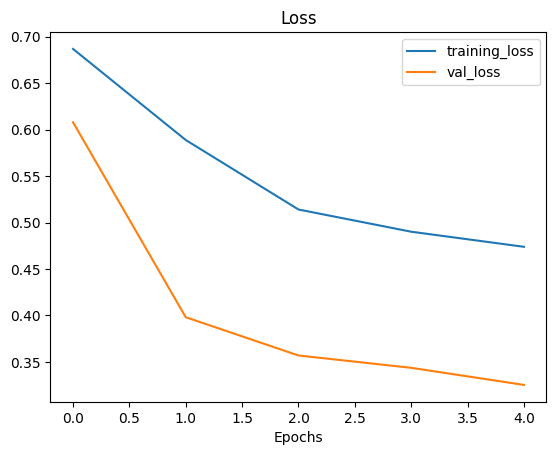

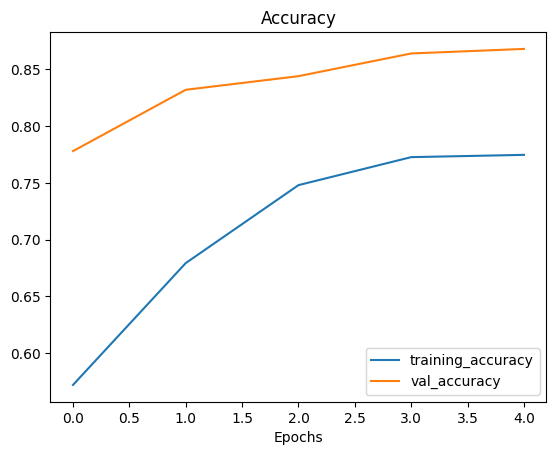

In [ ]:
plot_loss_curves(history_3)

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")

--2023-08-12 17:37:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-08-12 17:37:04 (27.7 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

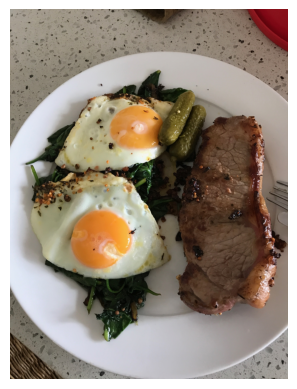

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
import tensorflow as tf

def load_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  img= img/255.
  return img


In [ ]:
steak = load_prep_image("03-steak.jpeg")

steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_3.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 377ms/step


array([[0.9385077]], dtype=float32)

**test to see if new commit gets pushed**